In [22]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


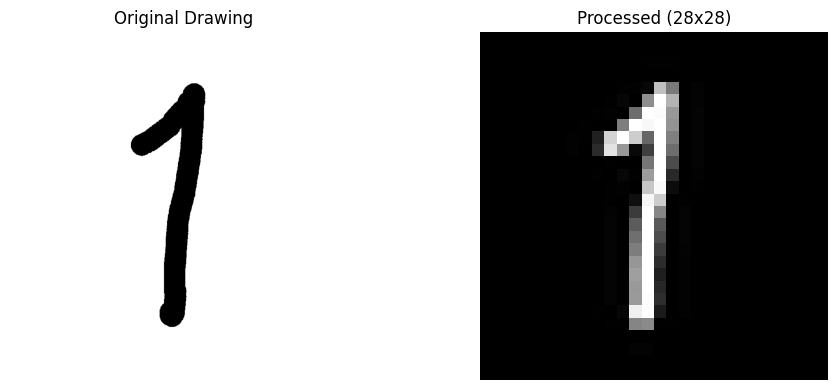

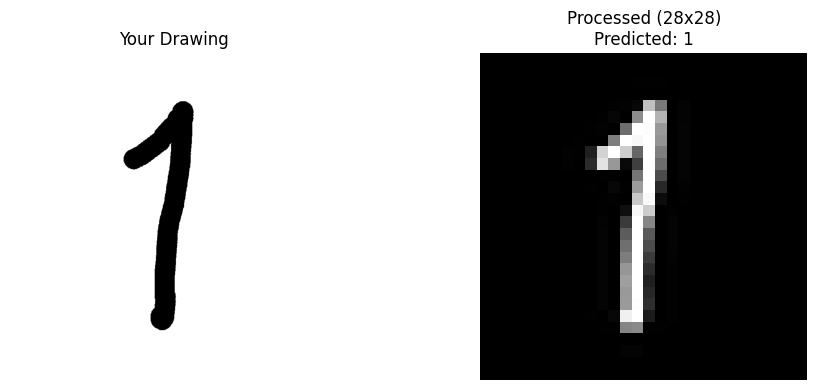

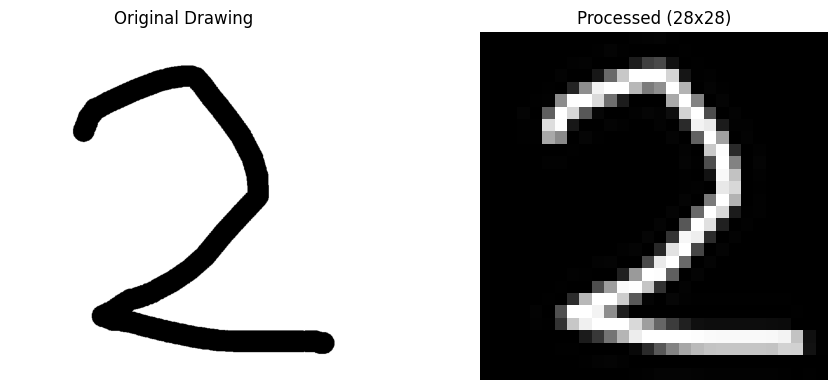

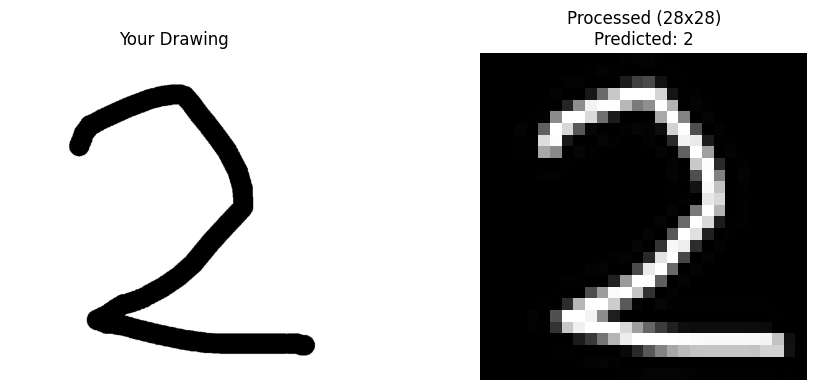

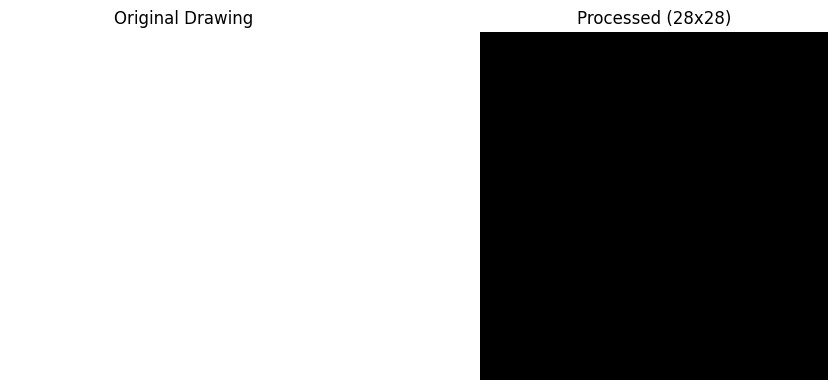

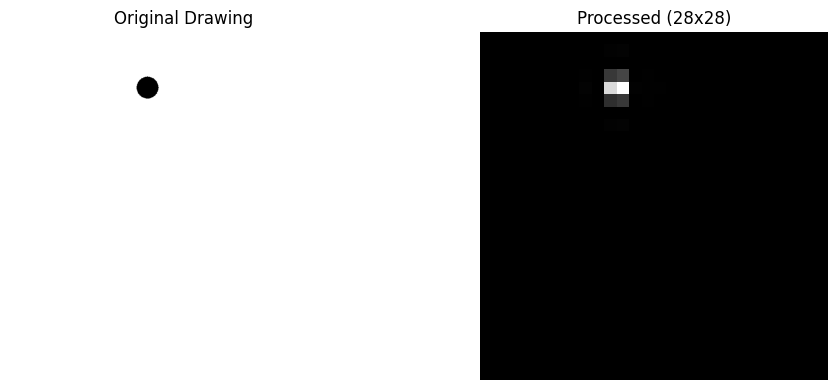

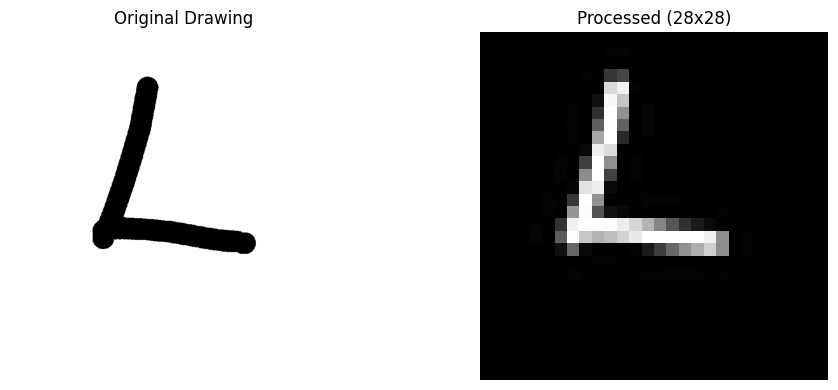

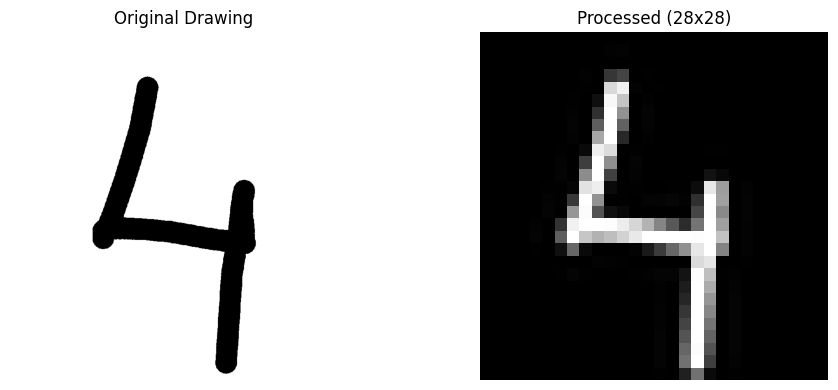

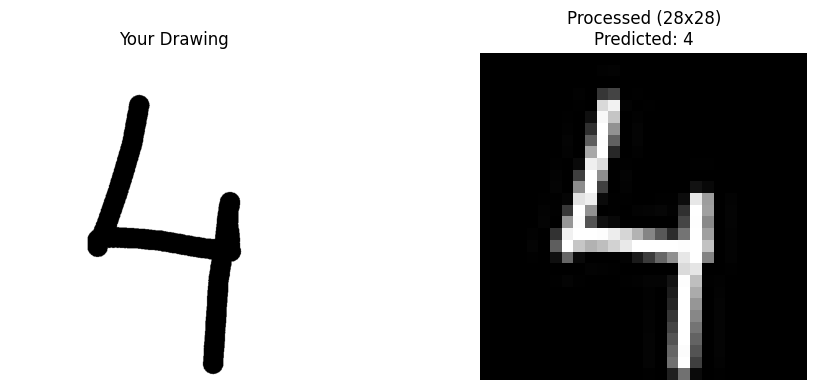

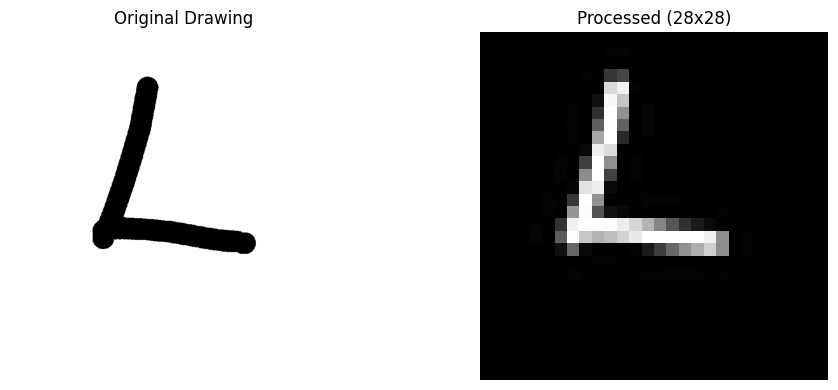

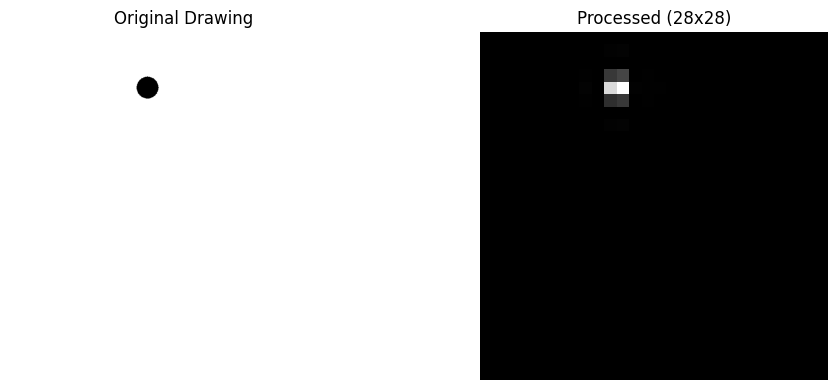

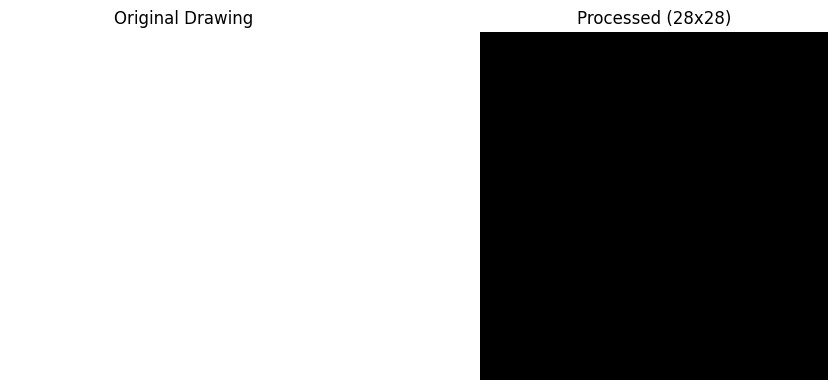

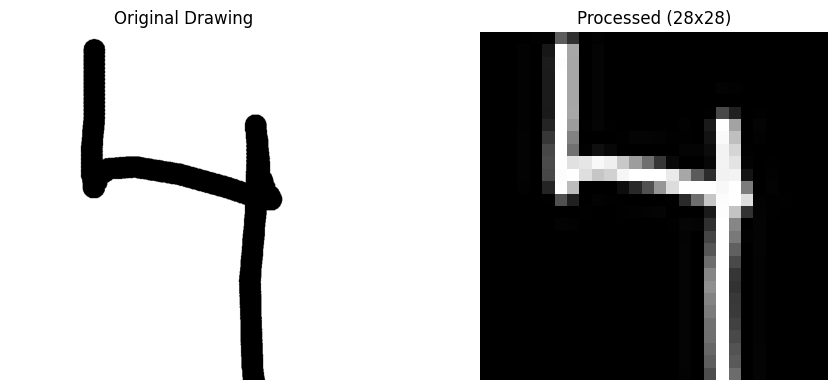

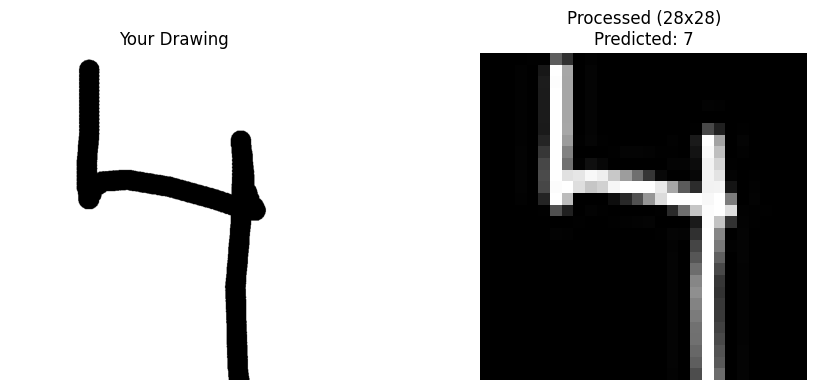

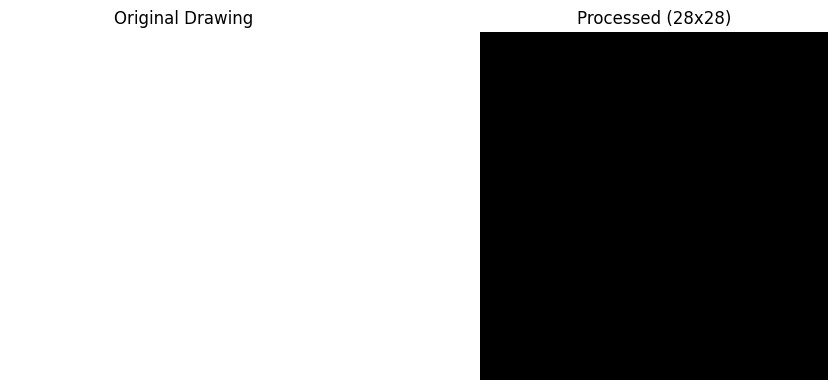

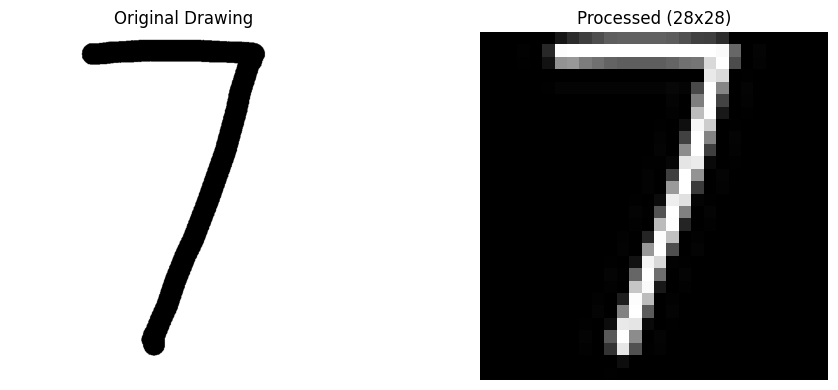

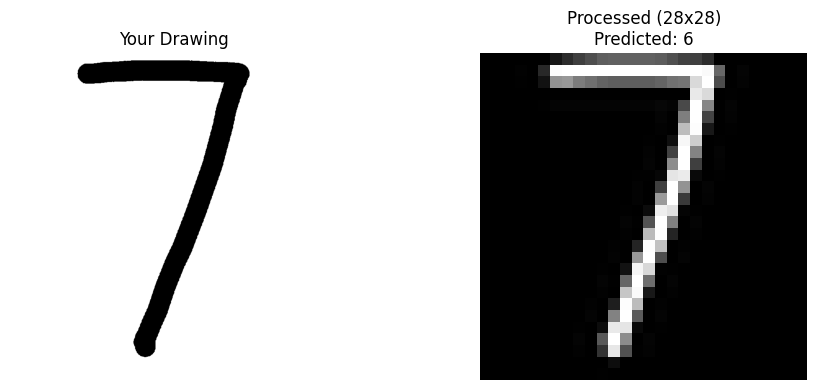

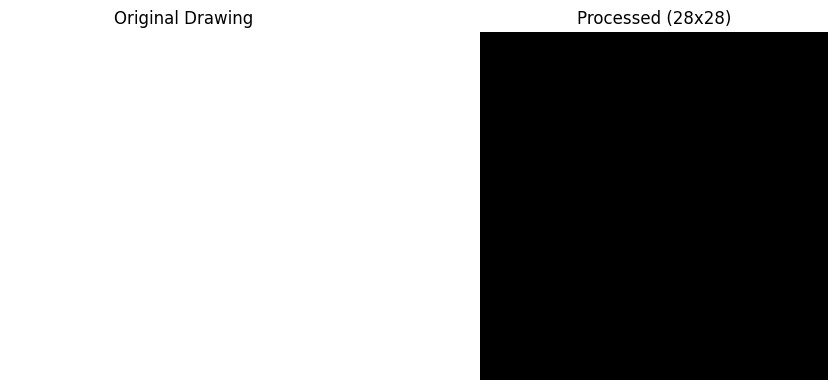

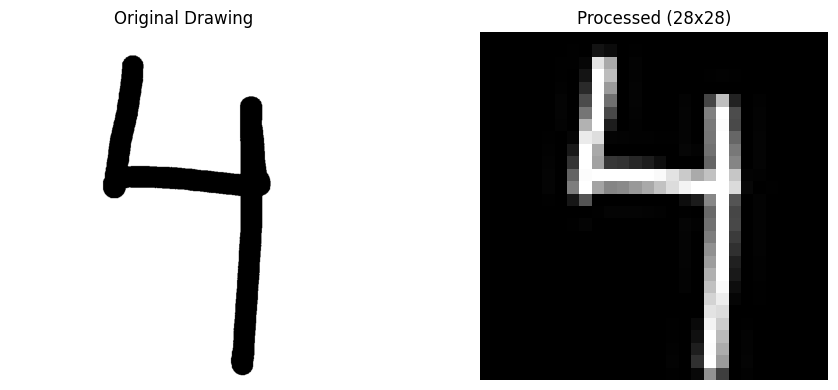

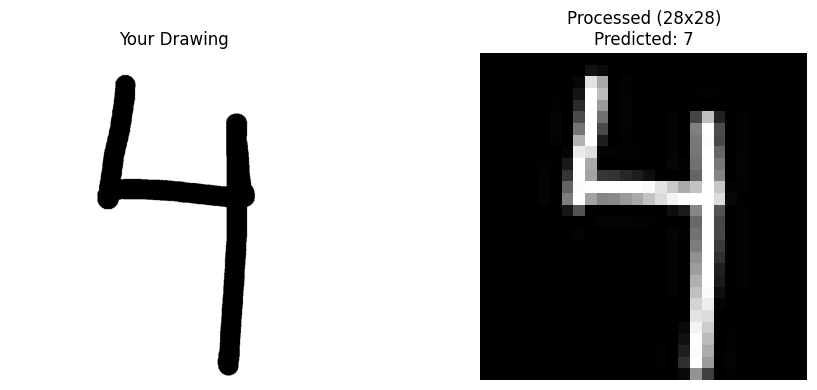

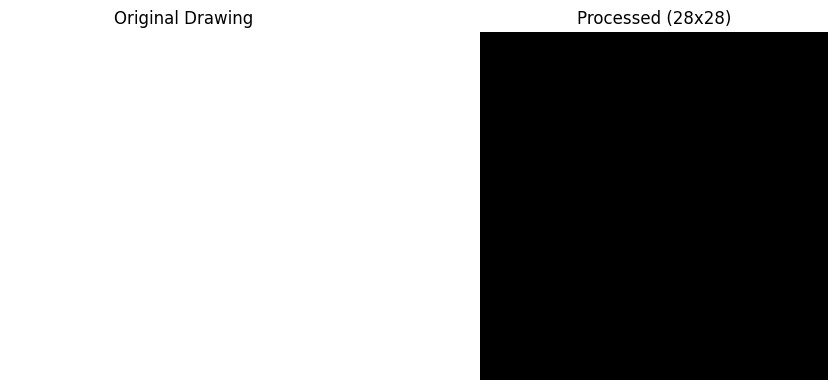

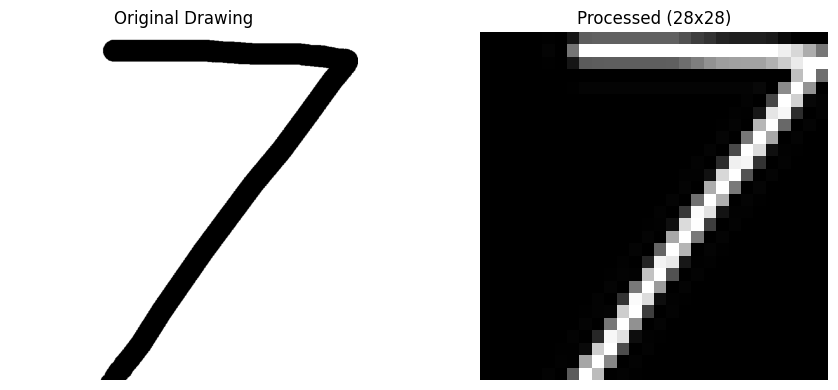

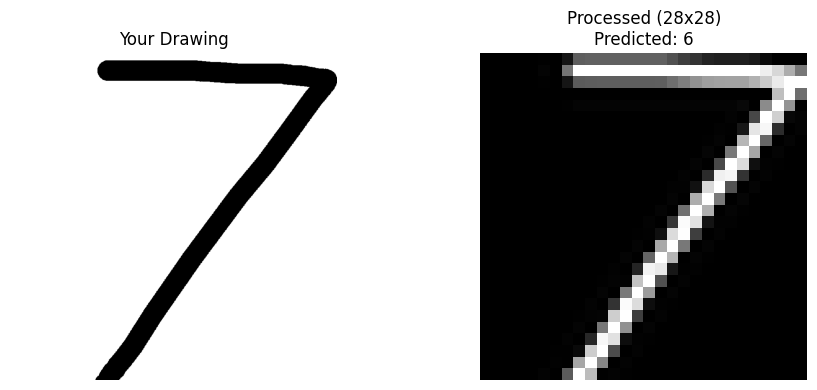

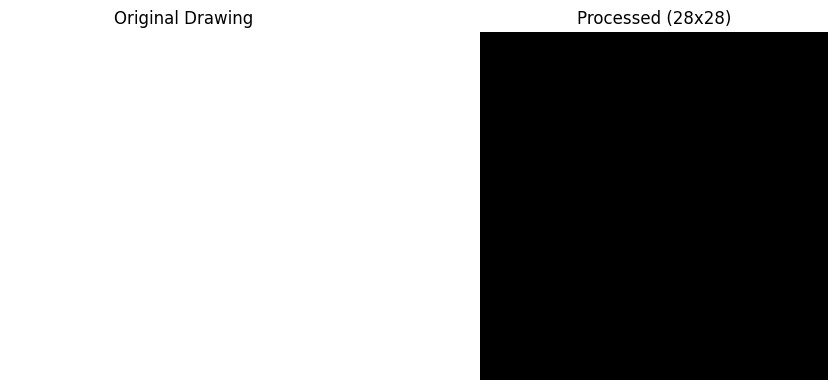

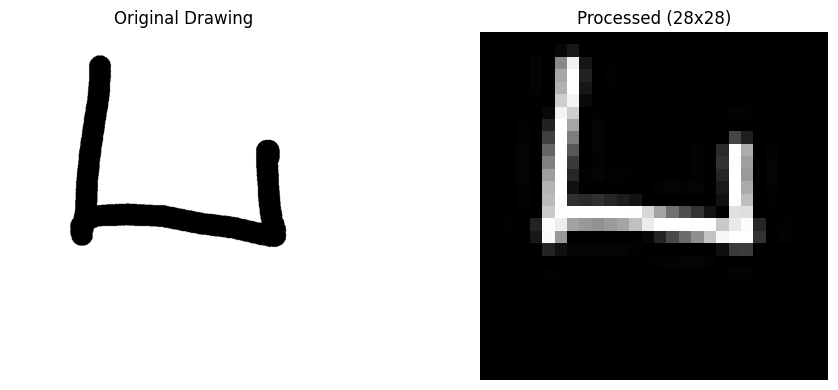

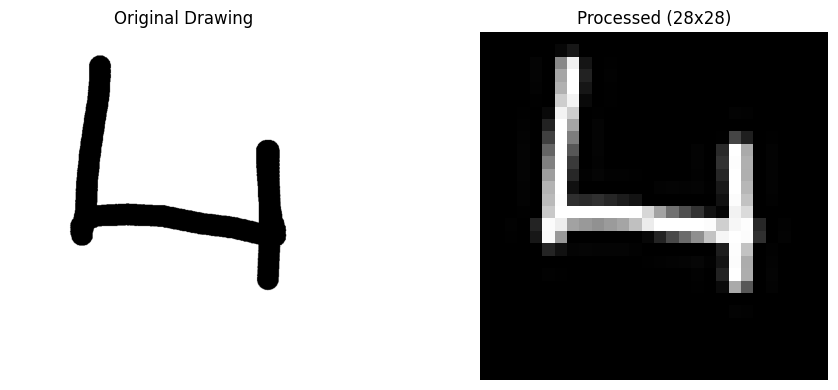

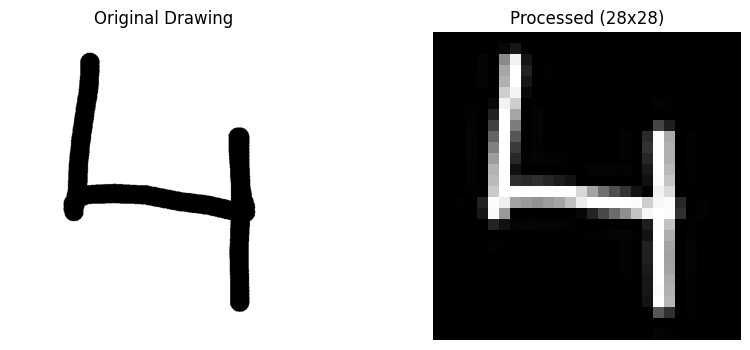

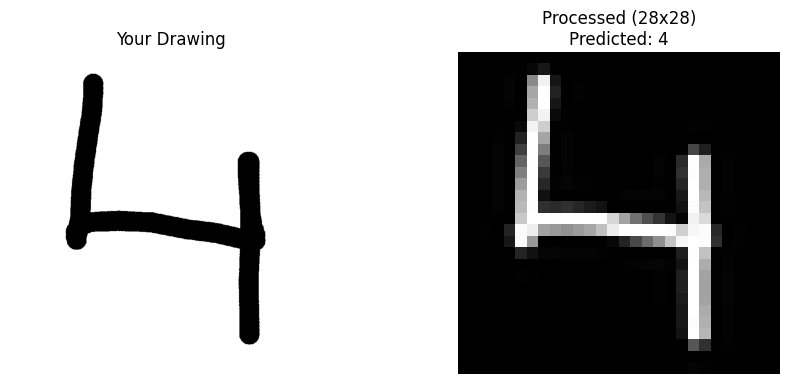

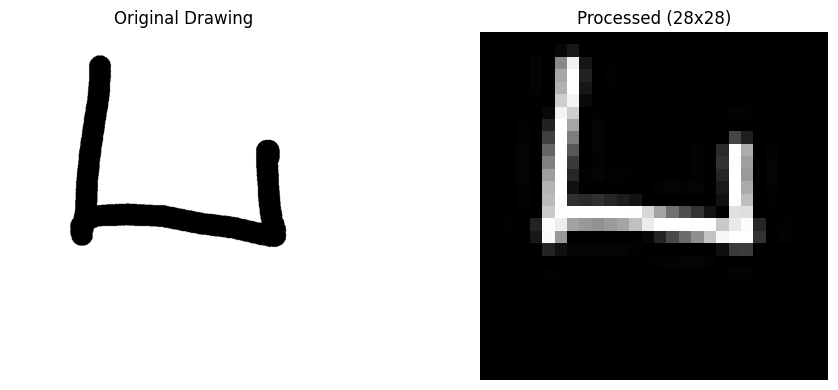

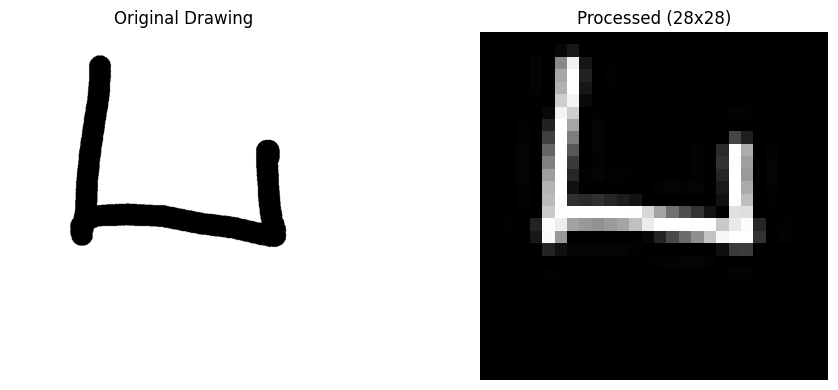

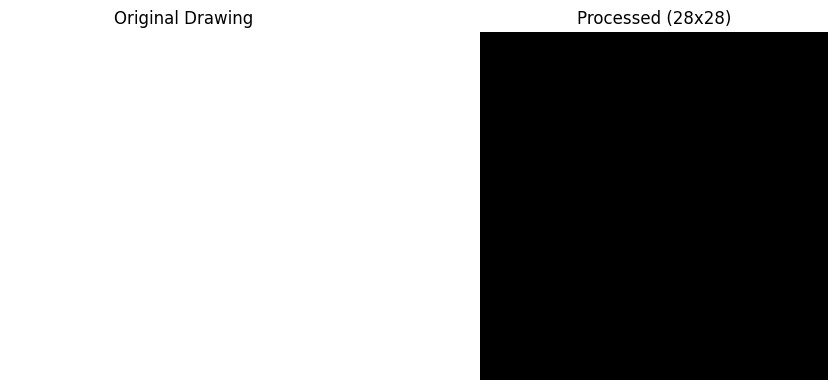

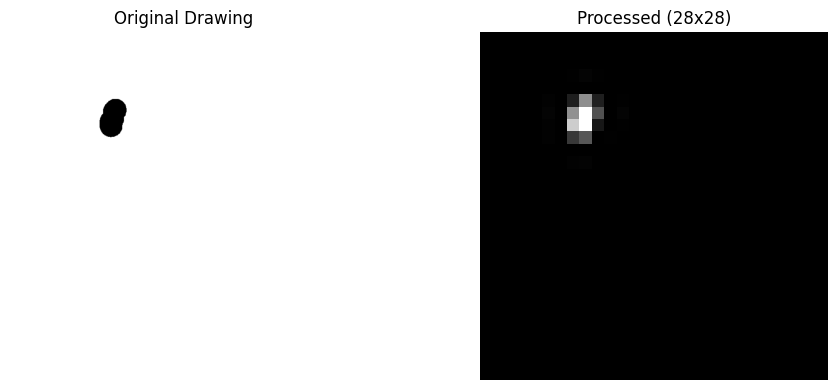

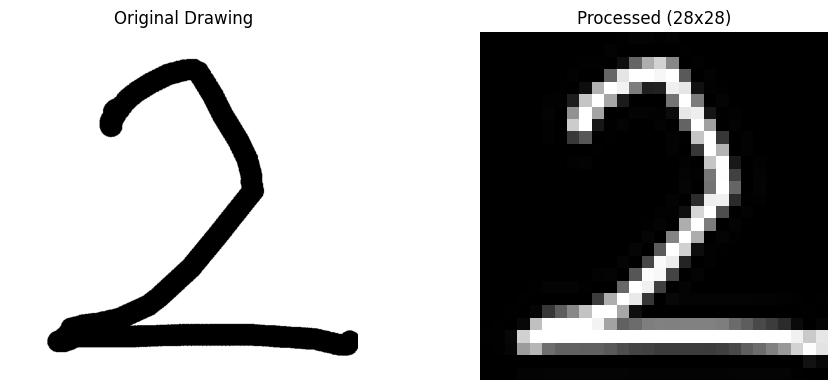

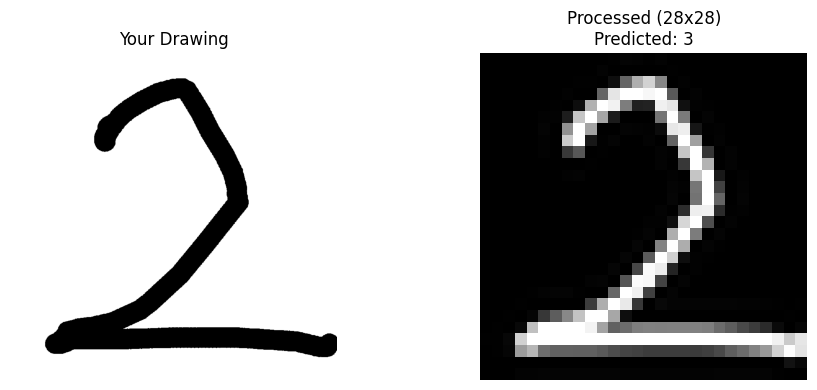

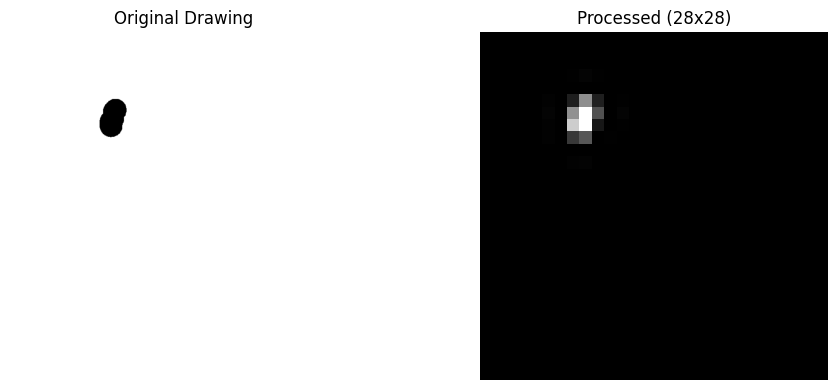

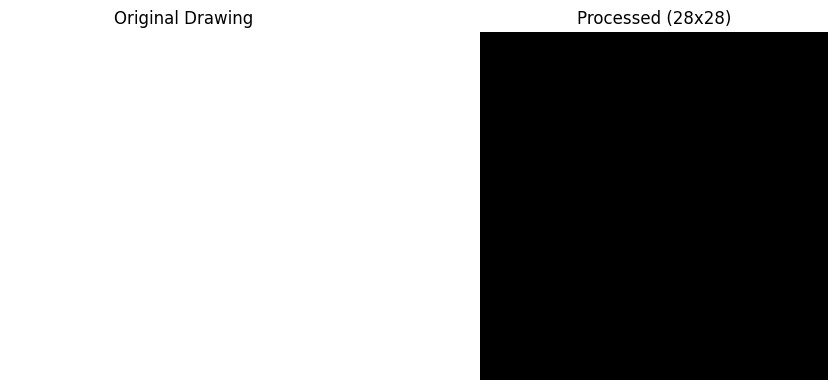

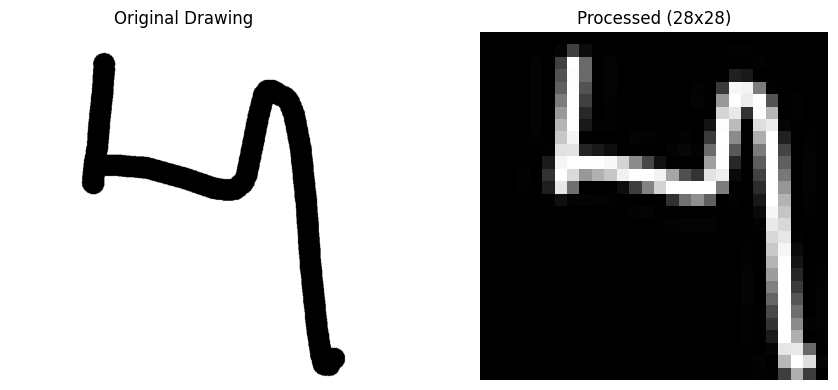

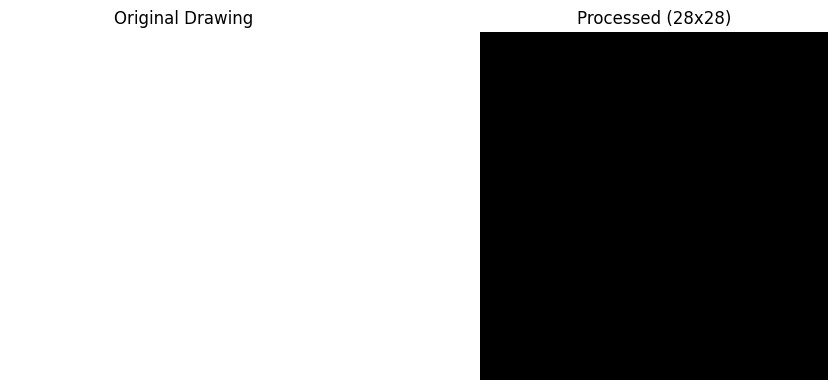

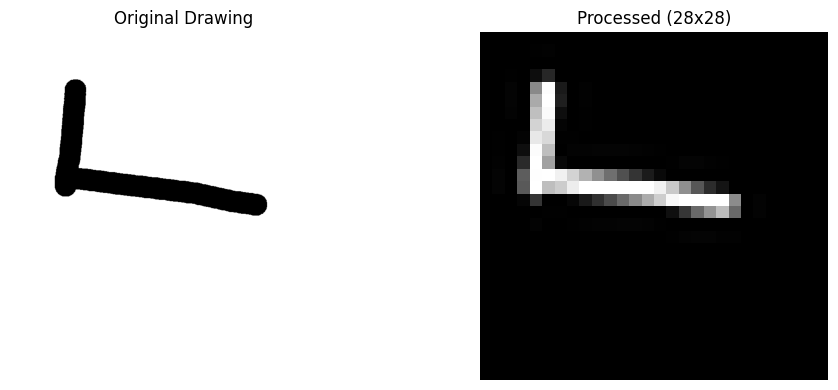

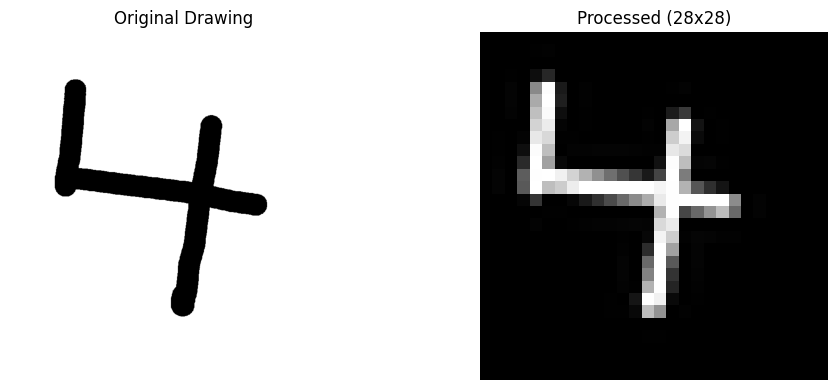

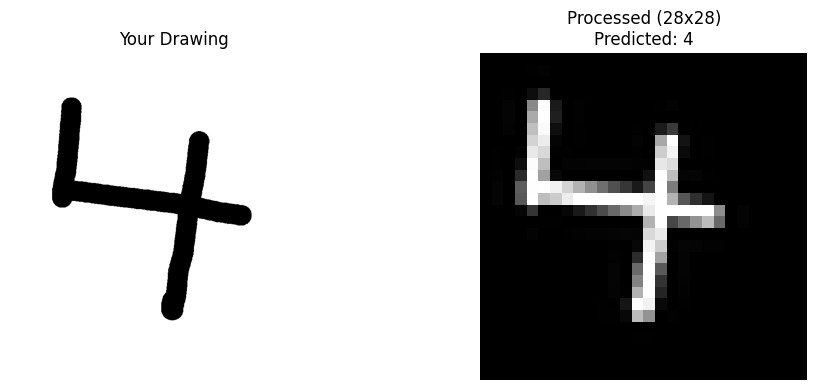

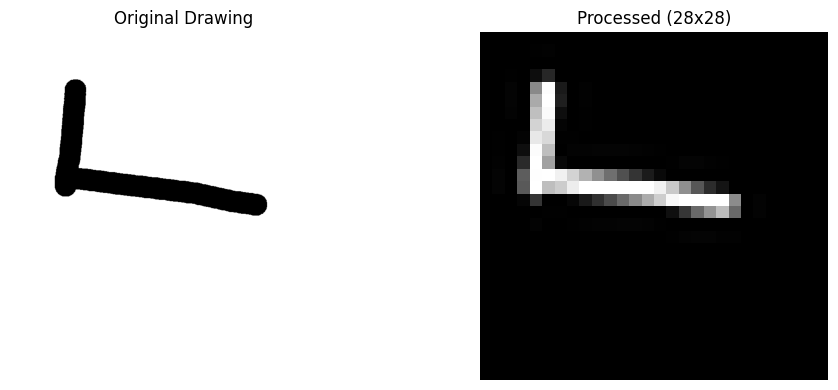

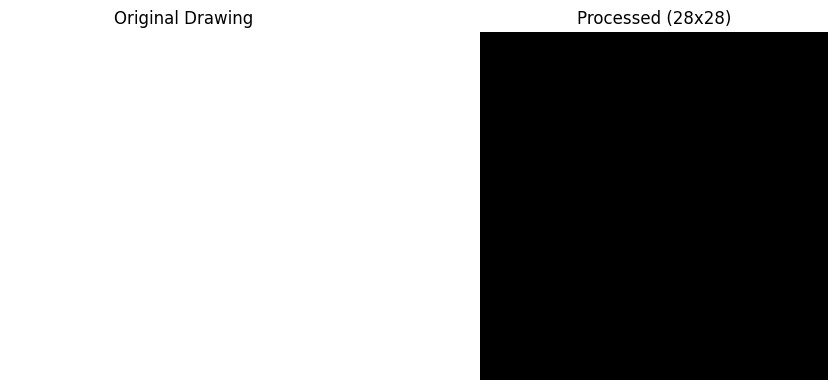

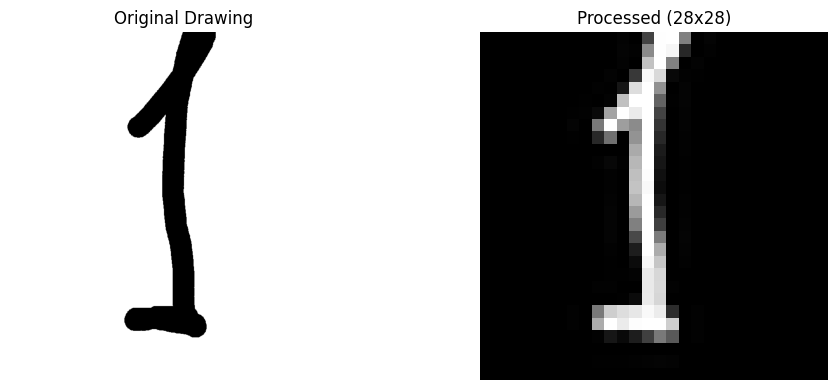

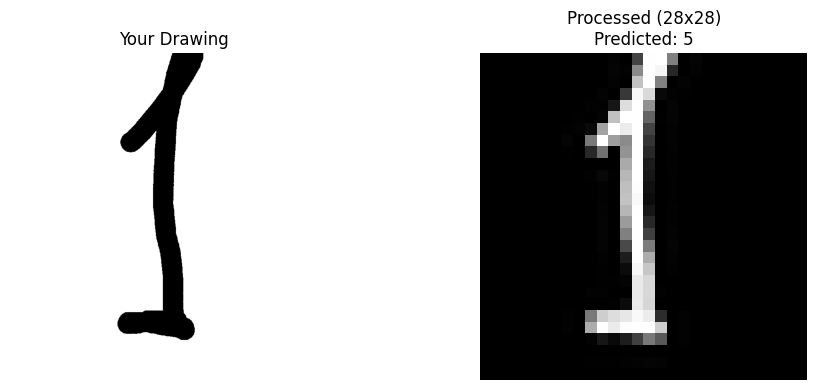

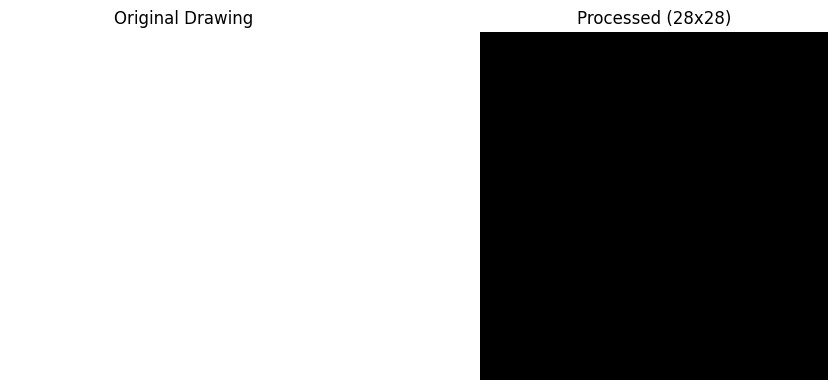

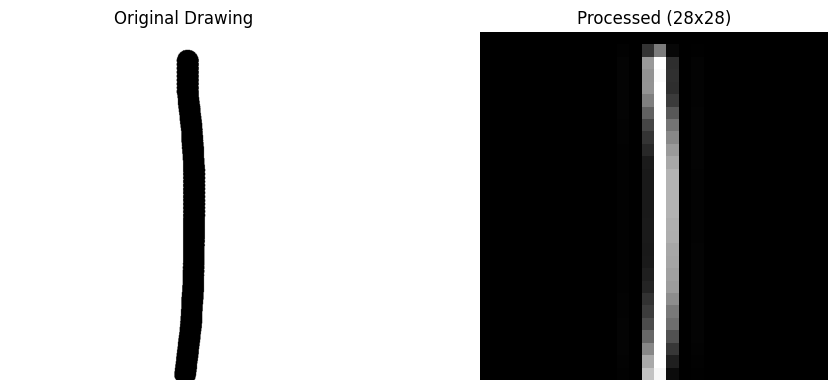

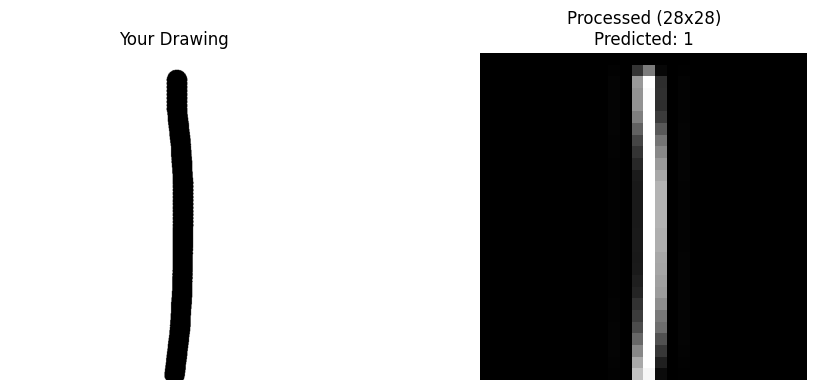

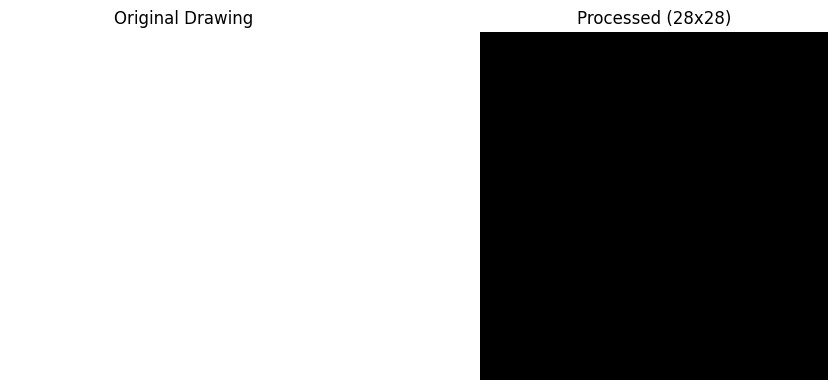

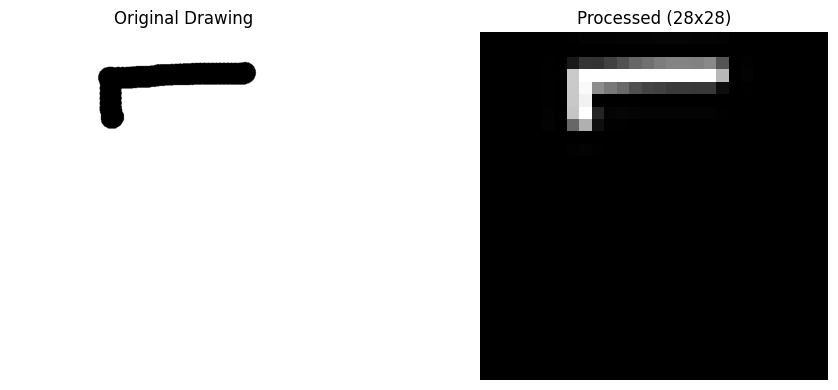

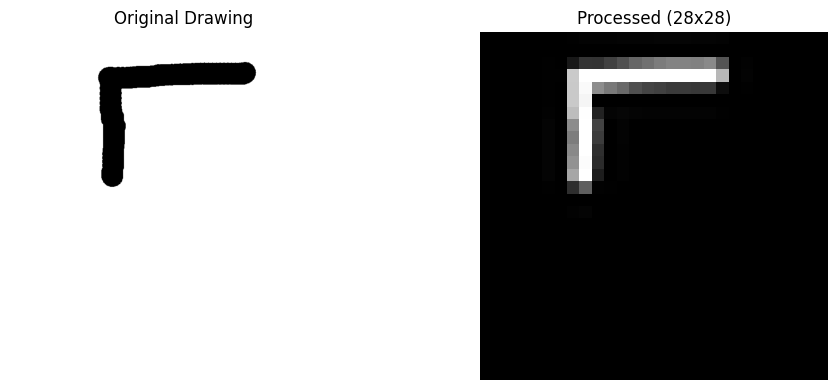

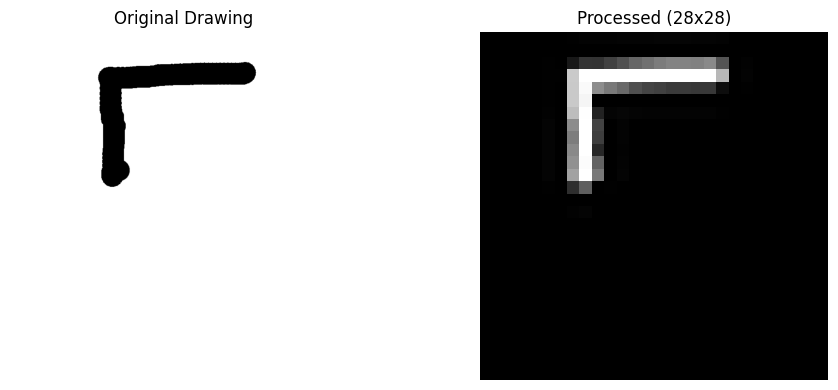

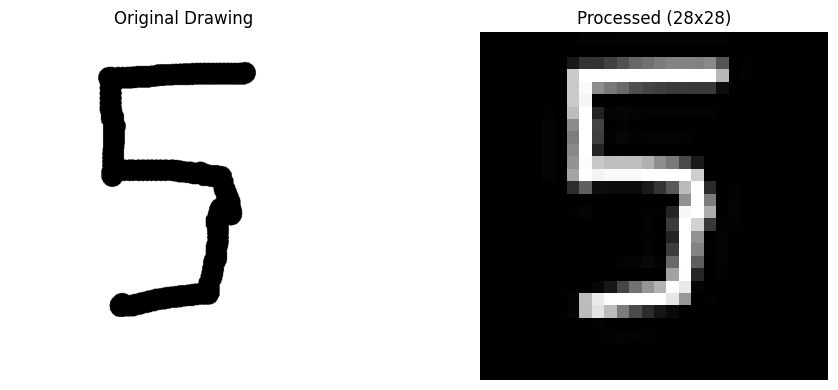

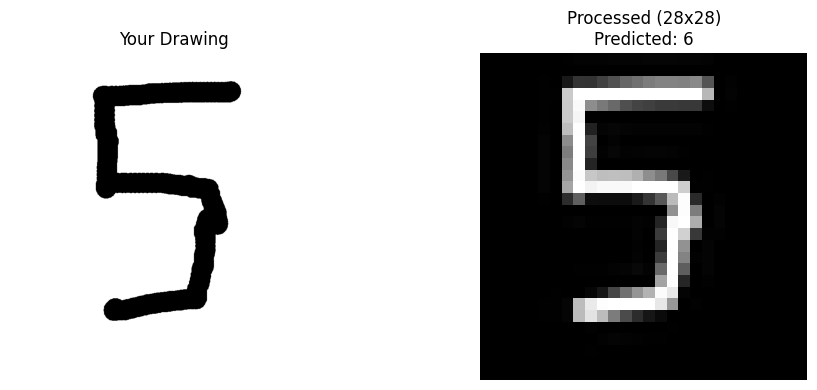

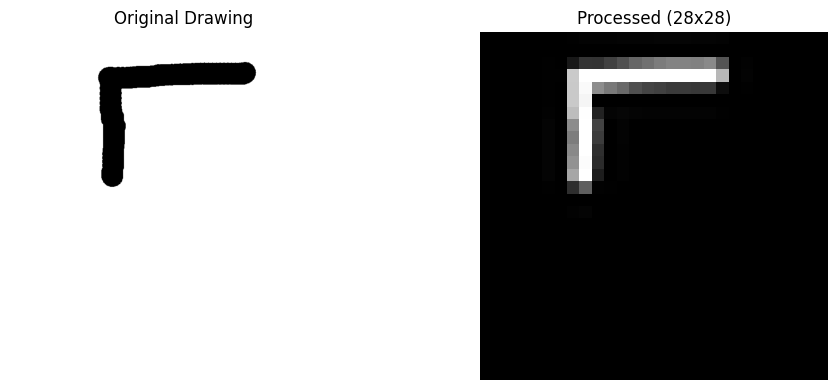

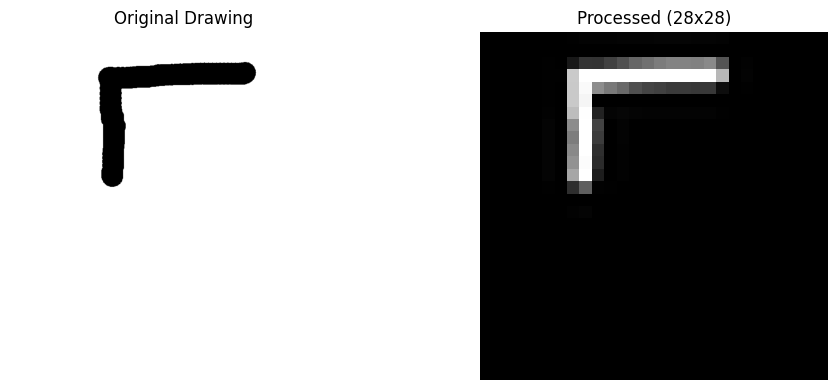

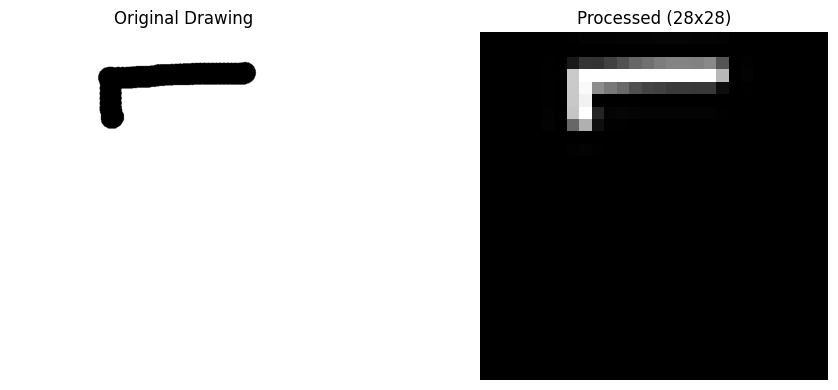

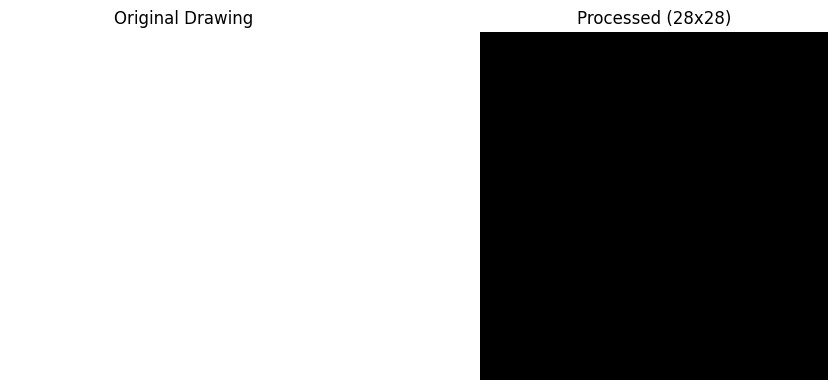

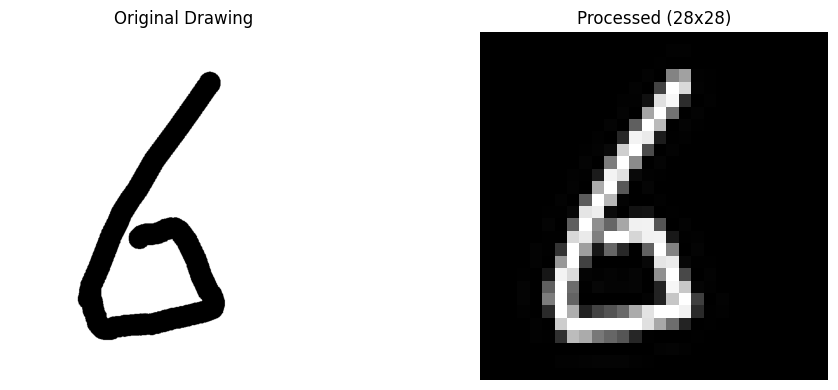

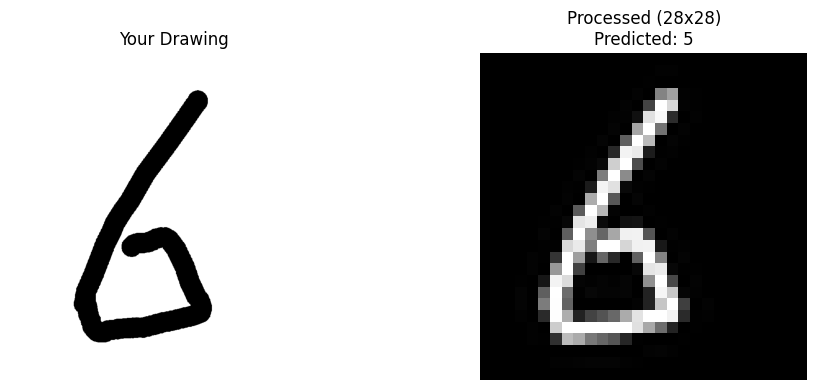

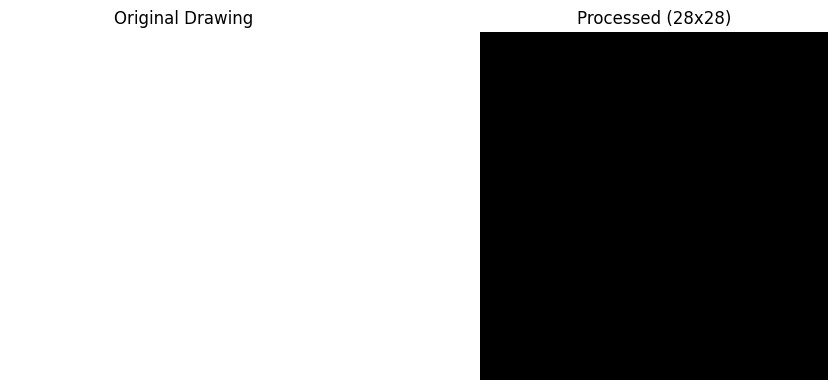

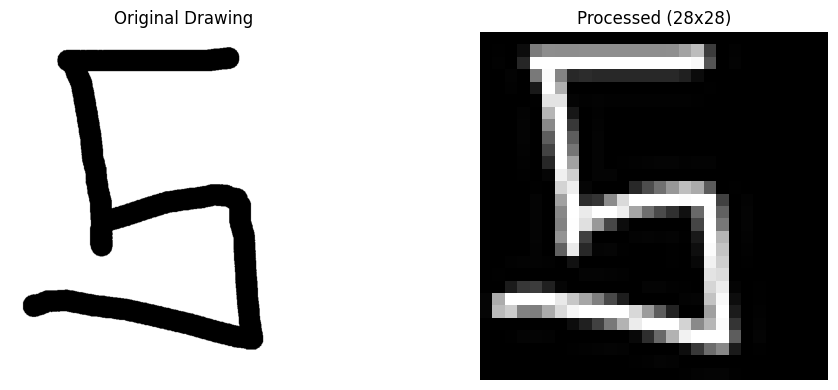

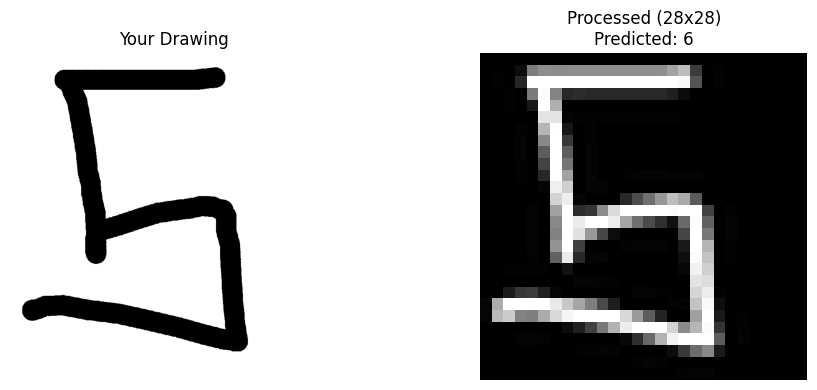

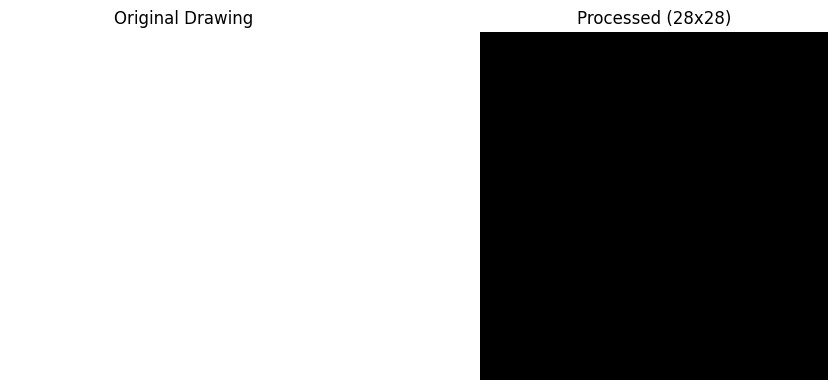

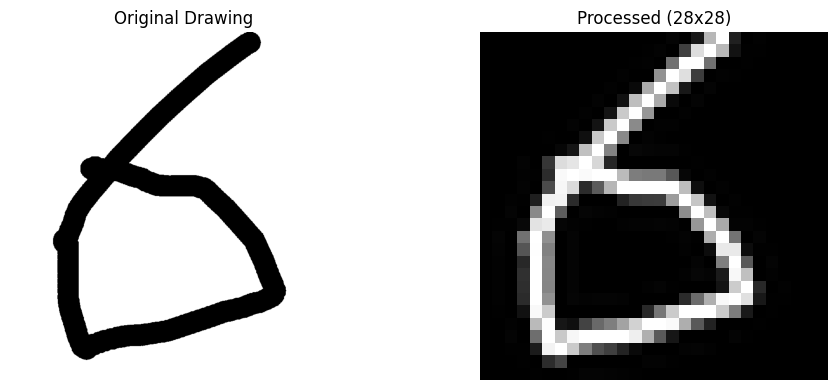

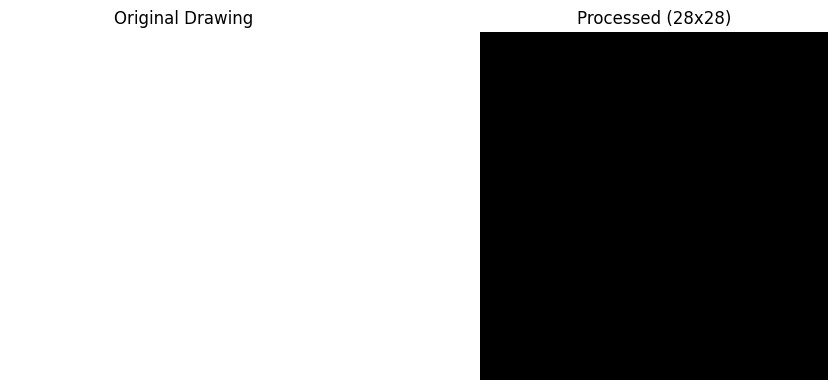

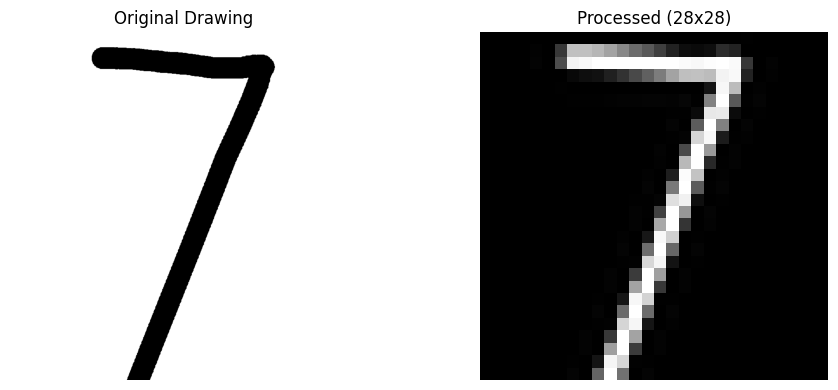

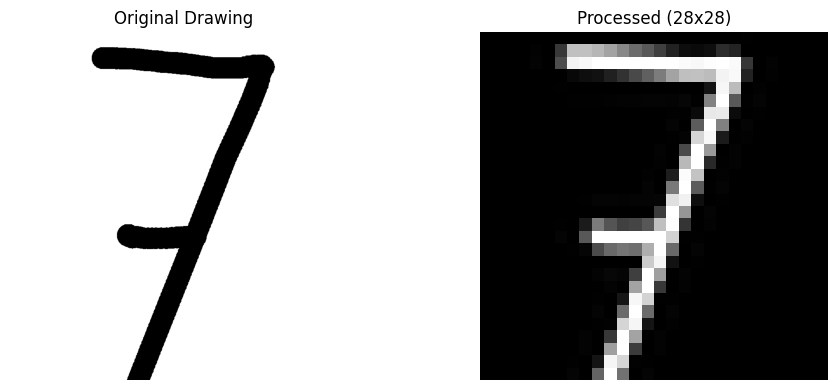

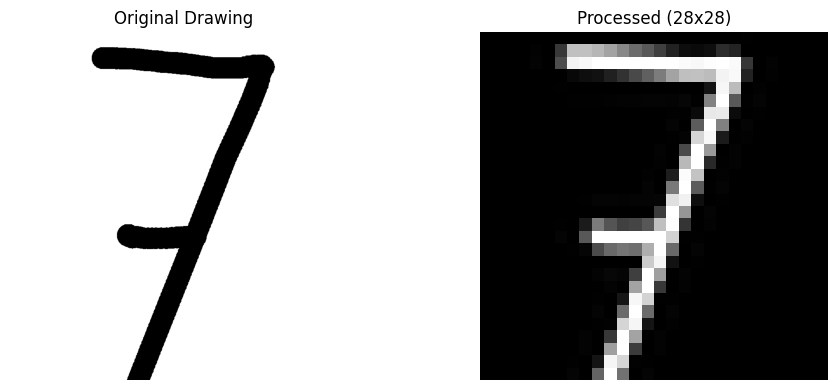

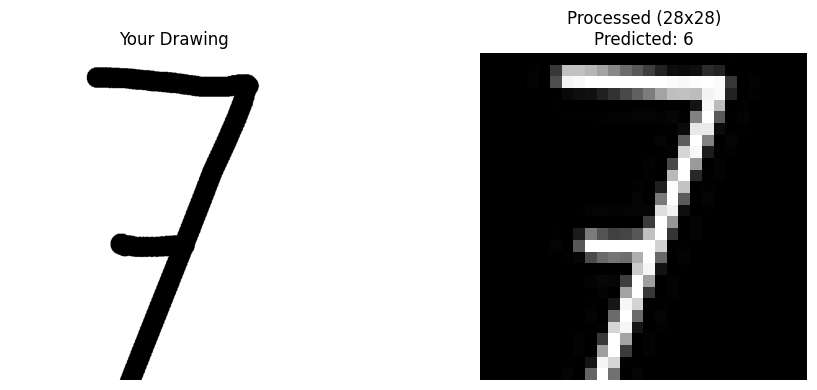

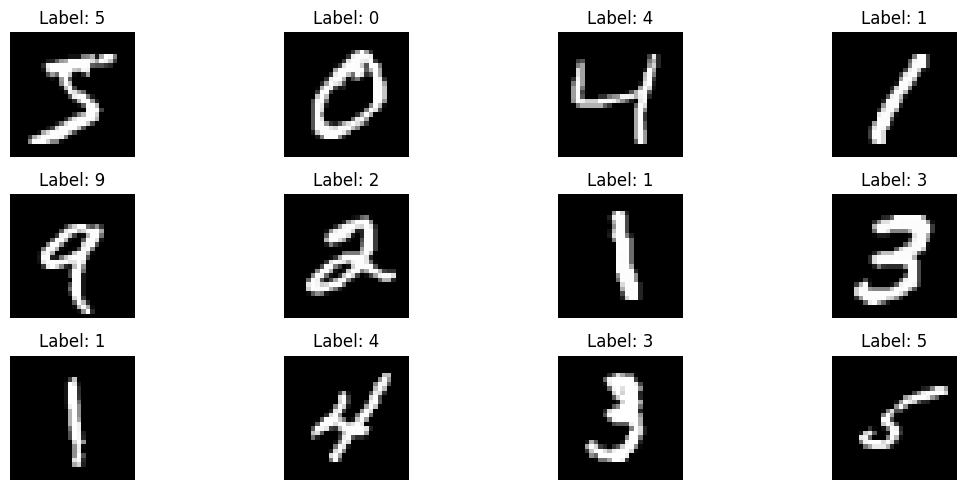

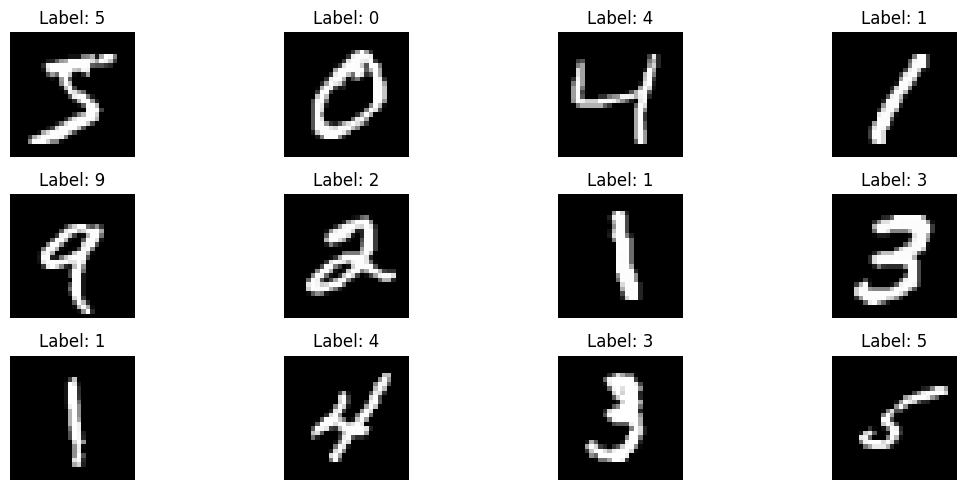

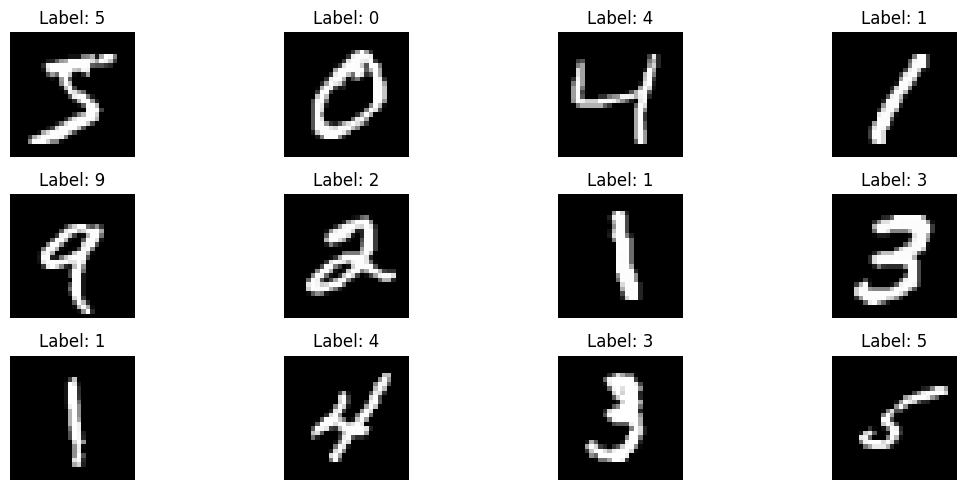

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

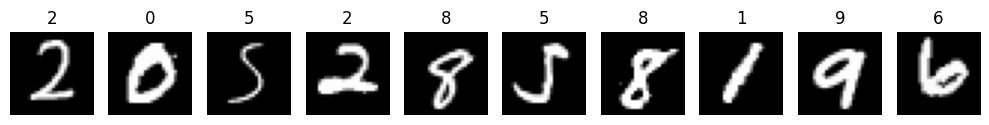

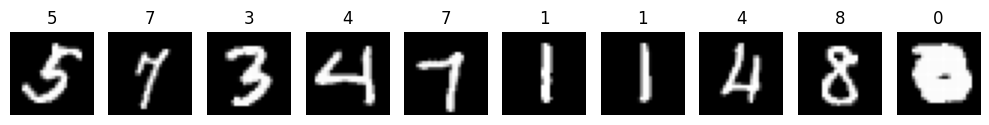

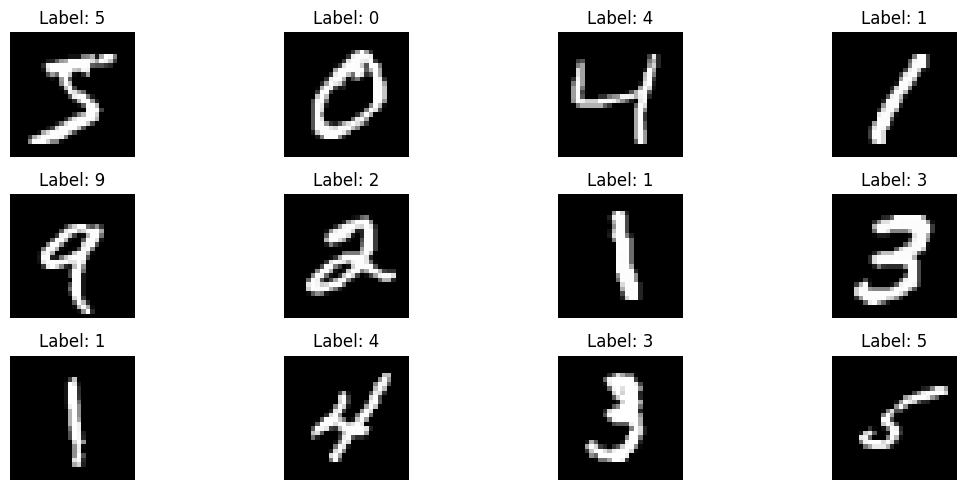

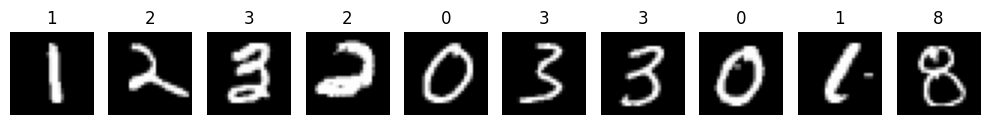

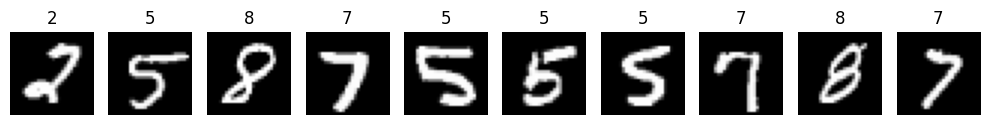

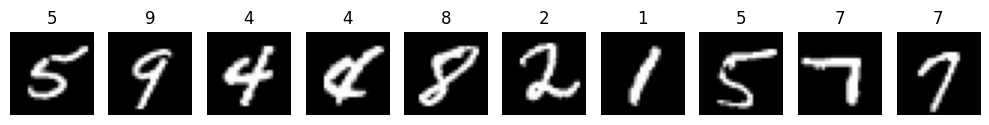

In [23]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape) 
print(y_train.shape)  
print(X_test.shape)   
print(y_test.shape)

print("Unique labels:", np.unique(y_train))


plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, X_train.shape[0])  # Pick a random index
    plt.subplot(1, 10, i + 1)                      # Create a subplot (1 row, 10 columns)
    plt.imshow(X_train[idx], cmap='gray')         # Show the image in grayscale
    plt.title(str(y_train[idx]))                  # Title = corresponding digit
    plt.axis('off')                               # Hide axes for cleaner view
plt.tight_layout()
plt.show()


In [17]:
print("Unique labels:", np.unique(y_train))


plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, X_train.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.tight_layout()
plt.show()


Unique labels: [0 1 2 3 4 5 6 7 8 9]


C:\Users\laphouse\AppData\Local\Temp\ipykernel_11400\2083943392.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [19]:
print("Pixel value range:", X_train.min(), "to", X_train.max())
print("Mean pixel value:", np.mean(X_train))
print("Standard deviation:", np.std(X_train))

Pixel value range: 0 to 255
Mean pixel value: 33.318421449829934
Standard deviation: 78.56748998339798


c:\Users\laphouse\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


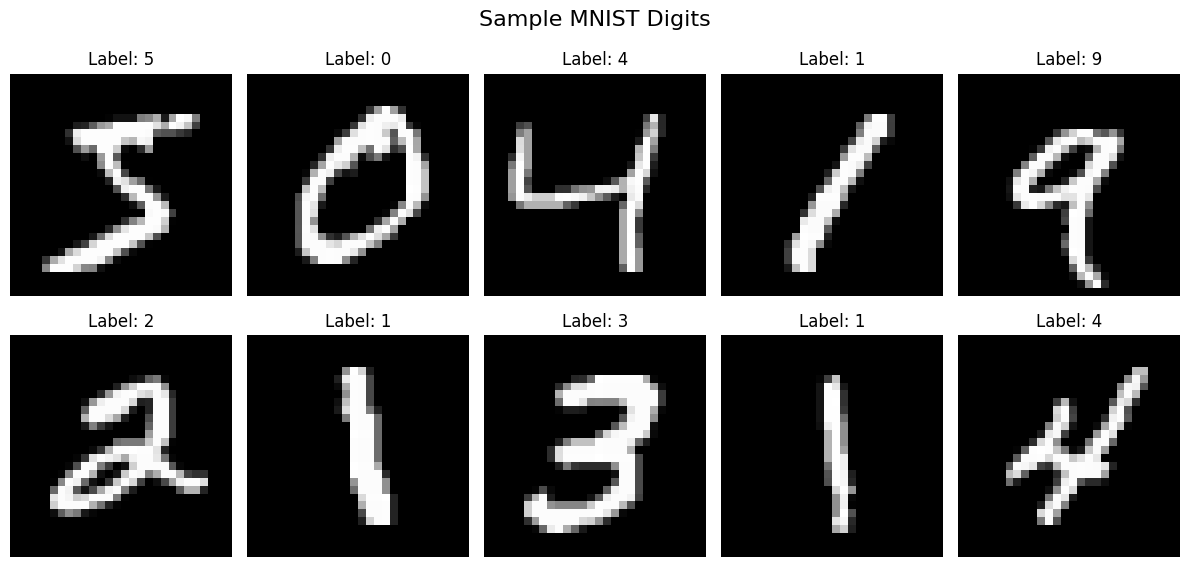

Preprocessing data...
Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)
Pixel value range: 0.00 to 1.00
Using subset of 10000 samples for faster training
Training MLP classifier...
Evaluating model...
Model trained with accuracy: 0.9586

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.94      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
w

C:\Users\laphouse\AppData\Local\Temp\ipykernel_11400\1052406891.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Deep learning
import tensorflow as tf
from tensorflow import keras
# Visualization and Interface
import gradio as gr
from PIL import Image, ImageOps
import io

# Load MNIST dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {X_train.shape}")  # (60000, 28, 28)
print(f"Training labels shape: {y_train.shape}")  # (60000,)
print(f"Test data shape: {X_test.shape}")  # (10000, 28, 28)
print(f"Test labels shape: {y_test.shape}")  # (10000,)

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=16)
plt.tight_layout()
plt.show()

# Preprocess the data
print("Preprocessing data...")
# Flatten the images from 28x28 to 784 features for MLP
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened training data shape: {X_train_flat.shape}")  # (60000, 784)
print(f"Flattened test data shape: {X_test_flat.shape}")  # (10000, 784)

# Normalize pixel values to 0-1 range
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

print(f"Pixel value range: {X_train_scaled.min():.2f} to {X_train_scaled.max():.2f}")

# Use a subset for faster training (optional - remove if you want full dataset)
# For demonstration, using 10k samples. Remove these lines for full dataset
subset_size = 10000
X_train_subset = X_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]
print(f"Using subset of {subset_size} samples for faster training")

# Train the model
print("Training MLP classifier...")
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),  # Larger layers for 28x28 images
    activation='relu',
    solver='adam',
    max_iter=50,  # Reduced iterations for faster training
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=5
)

# Train on subset (or full dataset if you remove subset creation above)
mlp.fit(X_train_subset, y_train_subset)

# Evaluate the model
print("Evaluating model...")
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Model trained with accuracy: {acc:.4f}")

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def preprocess_image(image):
    """
    Preprocess the drawn image to match MNIST format.
    MNIST uses 28x28 grayscale images with values 0-1.
    """
    # Convert to grayscale if needed
    if image.mode != 'L':
        image = image.convert('L')
    
    # Resize to 28x28 pixels (same as MNIST)
    image = image.resize((28, 28), Image.LANCZOS)
    
    # Convert to numpy array
    img_array = np.array(image)
    
    # Invert colors (black background, white digits -> white background, black digits)
    # MNIST has black digits on white background
    img_array = 255 - img_array
    
    # Normalize to 0-1 range (same as training data)
    img_array = img_array / 255.0
    
    # Flatten to 784 features (28x28 = 784)
    img_flattened = img_array.flatten()
    
    return img_flattened, img_array

def predict_digit(image):
    """
    Predict the digit and return probabilities for all classes.
    """
    try:
        # Check if image is None
        if image is None:
            return "Please draw a digit first", {}, None
        
        # Handle different image formats from Sketchpad
        if hasattr(image, 'image'):
            image_data = image.image
        elif isinstance(image, dict) and 'image' in image:
            image_data = image['image']
        elif isinstance(image, dict) and 'composite' in image:
            image_data = image['composite']
        else:
            image_data = image
        
        # Convert to PIL Image if it's a numpy array
        if isinstance(image_data, np.ndarray):
            image_pil = Image.fromarray(image_data.astype('uint8'))
        else:
            image_pil = image_data
        
        # Preprocess the image
        processed_image_flat, processed_image_2d = preprocess_image(image_pil)
        
        # Reshape for the model (needs to be 2D)
        processed_image_flat = processed_image_flat.reshape(1, -1)
        
        # Get prediction and probabilities
        prediction = mlp.predict(processed_image_flat)[0]
        probabilities = mlp.predict_proba(processed_image_flat)[0]
        
        # Create a dictionary of class probabilities
        prob_dict = {}
        for i, prob in enumerate(probabilities):
            prob_dict[f"Digit {i}"] = float(prob)
        
        # Create a figure showing the processed image
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        
        # Original drawing
        ax1.imshow(image_pil, cmap='gray')
        ax1.set_title('Your Drawing')
        ax1.axis('off')
        
        # Processed image (28x28)
        ax2.imshow(processed_image_2d, cmap='gray')
        ax2.set_title(f'Processed (28x28)\nPredicted: {prediction}')
        ax2.axis('off')
        
        plt.tight_layout()
        
        return f"Predicted Digit: {prediction} (Confidence: {np.max(probabilities):.3f})", prob_dict, fig
        
    except Exception as e:
        return f"Error: {str(e)}", {}, None

def show_processed_image(image):
    """
    Show how the image looks after preprocessing (for debugging).
    """
    try:
        # Check if image is None
        if image is None:
            return None
        
        # Handle different image formats from Sketchpad
        if hasattr(image, 'image'):
            image_data = image.image
        elif isinstance(image, dict) and 'image' in image:
            image_data = image['image']
        elif isinstance(image, dict) and 'composite' in image:
            image_data = image['composite']
        else:
            image_data = image
        
        # Convert to PIL Image if it's a numpy array
        if isinstance(image_data, np.ndarray):
            image_pil = Image.fromarray(image_data.astype('uint8'))
        else:
            image_pil = image_data
        
        processed_image_flat, processed_image_2d = preprocess_image(image_pil)
        
        # Create a matplotlib figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        
        # Original image
        ax1.imshow(image_pil, cmap='gray')
        ax1.set_title('Original Drawing')
        ax1.axis('off')
        
        # Processed image
        ax2.imshow(processed_image_2d, cmap='gray')
        ax2.set_title('Processed (28x28)')
        ax2.axis('off')
        
        plt.tight_layout()
        return fig
        
    except Exception as e:
        return None

# Create the Gradio interface
def create_interface():
    with gr.Blocks(title="MNIST Digit Classifier", theme=gr.themes.Soft()) as demo:
        gr.Markdown("# 🔢 MNIST Handwritten Digit Classifier")
        gr.Markdown("Draw a digit (0-9) in the box below and get predictions with probabilities!")
        gr.Markdown("*This model is trained on the famous MNIST dataset with 28x28 pixel images.*")
        
        with gr.Row():
            with gr.Column(scale=1):
                # Drawing canvas
                canvas = gr.Sketchpad(
                    label="Draw a digit here",
                    height=400,
                    width=400
                )
                
                # Buttons
                with gr.Row():
                    predict_btn = gr.Button("🔍 Predict", variant="primary")
                    clear_btn = gr.Button("🗑️ Clear")
                
            with gr.Column(scale=1):
                # Results
                prediction_output = gr.Textbox(
                    label="Prediction",
                    placeholder="Draw a digit and click Predict"
                )
                
                # Probability plot
                prob_plot = gr.Label(
                    label="Probability Distribution",
                    num_top_classes=10
                )
                
                # Processed image display
                processed_img = gr.Plot(label="Image Processing Preview")
        
        # Model information
        gr.Markdown("---")
        gr.Markdown("**Model Information:**")
        gr.Markdown(f"- **Dataset**: MNIST (60,000 training images)")
        gr.Markdown(f"- **Architecture**: MLP with layers (512, 256, 128)")
        gr.Markdown(f"- **Test Accuracy**: {acc:.4f}")
        gr.Markdown(f"- **Input**: 28x28 grayscale images (784 features)")
        gr.Markdown(f"- **Output**: 10 classes (digits 0-9)")
        gr.Markdown("- **Preprocessing**: Resize to 28x28, normalize to 0-1, flatten to 784 features")
        
        # Event handlers
        predict_btn.click(
            fn=predict_digit,
            inputs=[canvas],
            outputs=[prediction_output, prob_plot, processed_img]
        )
        
        clear_btn.click(
            fn=lambda: (None, "", {}, None),
            outputs=[canvas, prediction_output, prob_plot, processed_img]
        )
        
        # Also show processing preview on canvas change
        canvas.change(
            fn=show_processed_image,
            inputs=[canvas],
            outputs=[processed_img]
        )
    
    return demo

# Launch the interface
if __name__ == "__main__":
    demo = create_interface()
    
    # Display some example predictions from test set
    print("\n" + "="*50)
    print("EXAMPLE PREDICTIONS FROM TEST SET:")
    print("="*50)
    
    # Show a few examples from the test set
    for i in range(5):
        actual = y_test[i]
        predicted = y_pred[i]
        confidence = np.max(mlp.predict_proba(X_test_scaled[i:i+1]))
        print(f"Sample {i+1}: Actual={actual}, Predicted={predicted}, Confidence={confidence:.3f}")
    
    print("\n🚀 Launching Gradio interface...")
    demo.launch(
        share=True,  # Creates a public link
        inbrowser=True,  # Automatically opens in browser
    )